# Introduction

This notebook details the building of the Time Series models for Farcry. For both Cryptos (ETH and BTC), I compared two models, Prophet and Sarima, evalutaing its metrics and deciding which one of them is better for each coin. 

In [1]:
!pip install prophet yfinance matplotlib


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import yfinance as yf
import pandas as pd

# Bitcoin (BTC) - First Crypto

## Prophet

### Visualization

#### I tested diferent data range and the best was from 2022 to 2024, because the pandemics did not affect the variation of the data. 

In [28]:
# Fetch Bitcoin data from Yahoo Finance
btc_data = yf.download('BTC-USD', start='2022-01-01', end='2024-01-01')

# Display the first few rows of the data
btc_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500,47686.812500,24582667004
2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750,47345.218750,27951569547
2022-01-03,47343.542969,47510.726562,45835.964844,46458.117188,46458.117188,33071628362
2022-01-04,46458.851562,47406.546875,45752.464844,45897.574219,45897.574219,42494677905
2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906,43569.003906,36851084859


### Cleaning

In [29]:
# Prepare the data for Prophet
btc_prophet_df = btc_data.reset_index()[['Date', 'Close']]

# Prophet expects the columns to be named 'ds' (date) and 'y' (target value)
btc_prophet_df.columns = ['ds', 'y']

# Display the first few rows
btc_prophet_df.head()

,ds,y
0,2022-01-01,47686.812500
1,2022-01-02,47345.218750
2,2022-01-03,46458.117188
3,2022-01-04,45897.574219
4,2022-01-05,43569.003906


### Model Building

In [30]:
from prophet import Prophet

# Initialize the Prophet model
prophet_model = Prophet()

# Fit the model on the Bitcoin data
prophet_model.fit(btc_prophet_df)

14:29:59 - cmdstanpy - INFO - Chain [1] start processing
14:29:59 - cmdstanpy - INFO - Chain [1] done processing


In [31]:
# Create a dataframe for future dates (next 90 days)
future = prophet_model.make_future_dataframe(periods=90)

# Predict the future values
forecast = prophet_model.predict(future)

# Display the forecast
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
815,2024-03-26,48634.155583,43800.820768,53121.805785
816,2024-03-27,48757.465656,44057.678176,53816.469989
817,2024-03-28,48690.407204,43974.171219,53714.214890
818,2024-03-29,48737.232961,43883.291446,53640.796717
819,2024-03-30,48866.150181,43757.680477,54034.820718


/Users/alencar/Desktop/Inteli/Modulo7/Farcry/src/venv/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/alencar/Desktop/Inteli/Modulo7/Farcry/src/venv/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


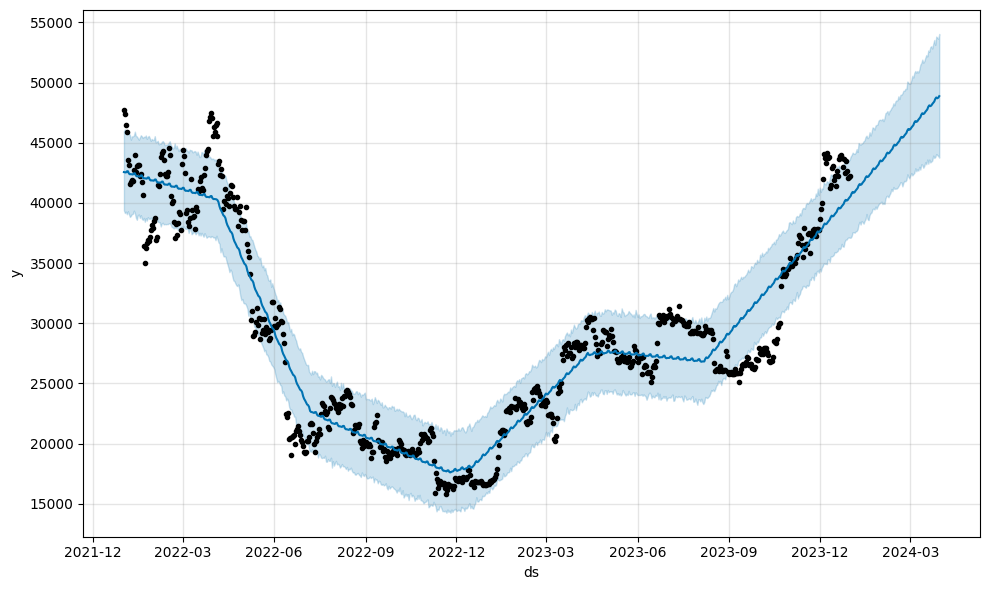

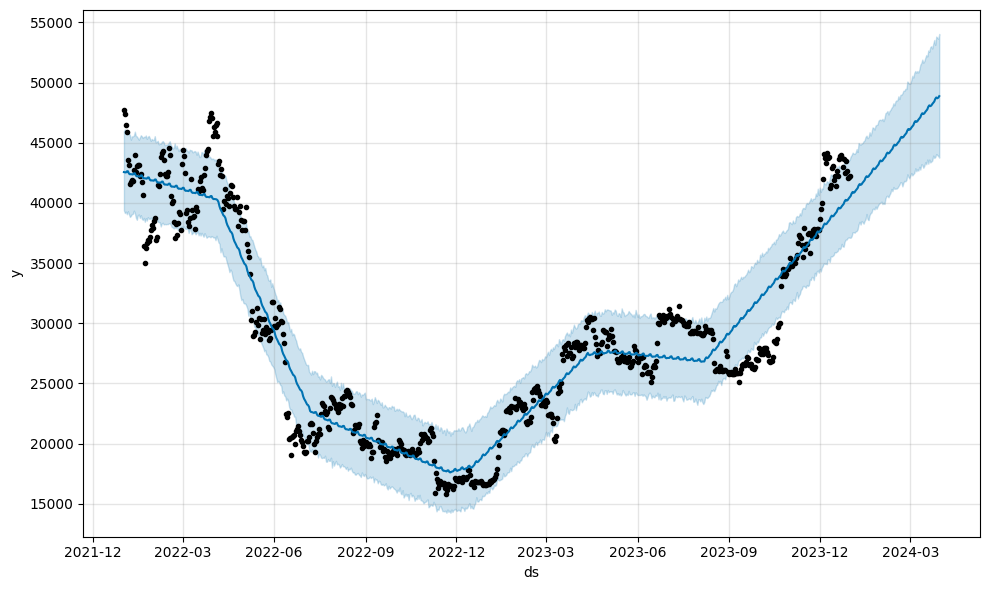

In [32]:
# Plot the forecast
prophet_model.plot(forecast)

### Testing

In [33]:
# Split data into train and test sets
train = btc_prophet_df.iloc[:-90]  # Training data up to 90 days before the end
test = btc_prophet_df.iloc[-90:]   # Last 90 days as test data

# Fit the model on the training data
prophet_model = Prophet()
prophet_model.fit(train)

14:30:01 - cmdstanpy - INFO - Chain [1] start processing
14:30:01 - cmdstanpy - INFO - Chain [1] done processing


In [34]:
# Create a future dataframe for the test period (last 90 days)
future_test = prophet_model.make_future_dataframe(periods=90)

# Predict on the test period
forecast_test = prophet_model.predict(future_test)

# Extract the forecast for the test period
predictions = forecast_test[['ds', 'yhat']].tail(90).set_index('ds')
test.set_index('ds', inplace=True)

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate MAE
mae = mean_absolute_error(test['y'], predictions['yhat'])
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test['y'], predictions['yhat']))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 9359.066564372635
Root Mean Squared Error (RMSE): 10897.857602812588


## SARIMA

In [3]:
# Fetch Bitcoin data from Yahoo Finance
btc_data = yf.download('BTC-USD', start='2022-01-01', end='2024-09-24')

# Display the first few rows of the data
btc_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500,47686.812500,24582667004
2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750,47345.218750,27951569547
2022-01-03,47343.542969,47510.726562,45835.964844,46458.117188,46458.117188,33071628362
2022-01-04,46458.851562,47406.546875,45752.464844,45897.574219,45897.574219,42494677905
2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906,43569.003906,36851084859


In [4]:
import numpy as np

# Log-transform the 'Close' prices to stabilize variance
btc_data['Close_log'] = np.log(btc_data['Close'])

# Display the first few rows of the log-transformed data
btc_data[['Close', 'Close_log']].head()

,Close,Close_log
Date,,
2022-01-01,47686.812500,10.772410
2022-01-02,47345.218750,10.765221
2022-01-03,46458.117188,10.746306
2022-01-04,45897.574219,10.734168
2022-01-05,43569.003906,10.682101


In [5]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the SARIMA model parameters
# (p, d, q) = ARIMA terms, (P, D, Q, S) = seasonal terms
sarima_model = SARIMAX(btc_data['Close_log'], 
                       order=(1, 1, 1), 
                       seasonal_order=(1, 1, 1, 30))  # Monthly seasonality
sarima_result = sarima_model.fit(maxiter=50) 

# Print the summary of the SARIMA model
print(sarima_result.summary())

/Users/alencar/Desktop/Inteli/Modulo7/Farcry/src/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/alencar/Desktop/Inteli/Modulo7/Farcry/src/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.91093D+00    |proj g|=  9.57944D+00

At iterate    5    f= -1.96574D+00    |proj g|=  6.57553D-01

At iterate   10    f= -1.97708D+00    |proj g|=  2.43676D+00

At iterate   15    f= -1.97872D+00    |proj g|=  2.19225D-01

At iterate   20    f= -1.98286D+00    |proj g|=  2.60488D+00

At iterate   25    f= -2.00442D+00    |proj g|=  5.81449D-02

At iterate   30    f= -2.01016D+00    |proj g|=  4.70583D-02

At iterate   35    f= -2.01033D+00    |proj g|=  1.50996D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     89      2     0     0   1.510D-03  -2.010D+00
  F =  -2.0103259005318903     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


                                     SARIMAX Results                                      
Dep. Variable:                          Close_log   No. Observations:                  997
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 30)   Log Likelihood                2004.295
Date:                            Wed, 25 Sep 2024   AIC                          -3998.590
Time:                                    14:47:55   BIC                          -3974.224
Sample:                                01-01-2022   HQIC                         -3989.314
                                     - 09-23-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5947      0.926     -0.642      0.521      -2.410       1.221
ma.L1          0.5794      0.933   

In [6]:
# Forecast the next 90 days
forecast_steps = 90
forecast_log_sarima = sarima_result.forecast(steps=forecast_steps)

# Convert the forecast back to the original scale (exponential)
forecast_sarima = np.exp(forecast_log_sarima)

# Create a date range for the forecast period
forecast_dates = pd.date_range(start=btc_data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps)

# Create a DataFrame to store the forecast
forecast_df_sarima = pd.DataFrame({'Date': forecast_dates, 'Forecast': forecast_sarima})
forecast_df_sarima.set_index('Date', inplace=True)

# Display the forecast
forecast_df_sarima.head(10)

,Forecast
Date,
2024-09-24,63655.373598
2024-09-25,63660.096096
2024-09-26,63526.572332
2024-09-27,63051.306590
2024-09-28,62934.757510
2024-09-29,62351.666967
2024-09-30,62989.592051
2024-10-01,62851.270907
2024-10-02,62798.582773


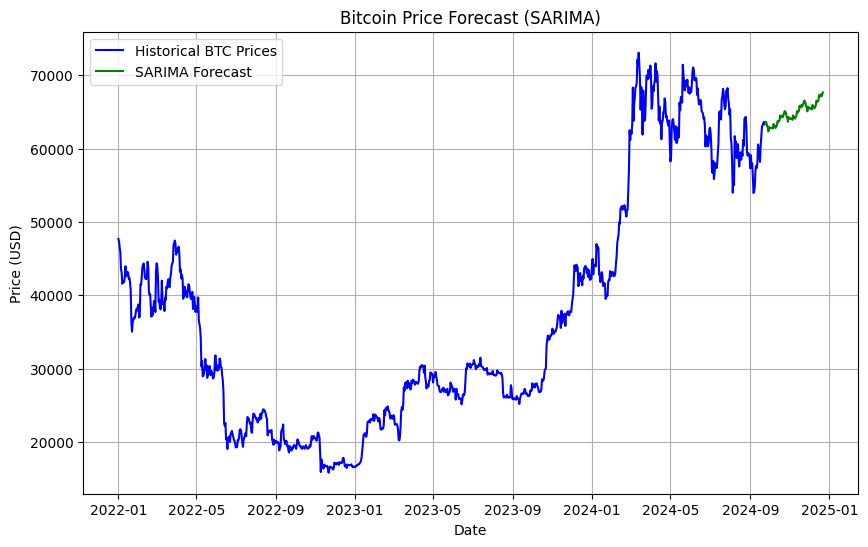

In [7]:
import matplotlib.pyplot as plt

# Plot the historical 'Close' prices and the SARIMA forecast
plt.figure(figsize=(10, 6))

# Plot historical Bitcoin prices
plt.plot(btc_data.index, btc_data['Close'], label='Historical BTC Prices', color='blue')

# Plot SARIMA forecasted prices
plt.plot(forecast_df_sarima.index, forecast_df_sarima['Forecast'], label='SARIMA Forecast', color='green')

# Add title and labels
plt.title('Bitcoin Price Forecast (SARIMA)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [8]:
# Train-test split: last 90 days as test data
train = btc_data['Close_log'][:-90]
test = btc_data['Close_log'][-90:]

In [9]:
# Fit SARIMA model on the training data
sarima_model_train = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 30))
sarima_result_train = sarima_model_train.fit(maxiter=50)

# Forecast for the next 90 days (test period)
forecast_test_log = sarima_result_train.forecast(steps=90)
forecast_test = np.exp(forecast_test_log)  # Convert back to original scale

/Users/alencar/Desktop/Inteli/Modulo7/Farcry/src/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/alencar/Desktop/Inteli/Modulo7/Farcry/src/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.89761D+00    |proj g|=  9.30249D+00


 This problem is unconstrained.



At iterate    5    f= -1.94990D+00    |proj g|=  9.32090D-01

At iterate   10    f= -1.96299D+00    |proj g|=  1.03898D-01

At iterate   15    f= -1.96810D+00    |proj g|=  8.35269D-01

At iterate   20    f= -1.99094D+00    |proj g|=  8.05789D-02

At iterate   25    f= -1.99574D+00    |proj g|=  9.92902D-01

At iterate   30    f= -1.99715D+00    |proj g|=  2.30135D-02

At iterate   35    f= -1.99715D+00    |proj g|=  9.33270D-03

At iterate   40    f= -1.99715D+00    |proj g|=  5.64628D-03

At iterate   45    f= -1.99715D+00    |proj g|=  6.97391D-02

At iterate   50    f= -1.99716D+00    |proj g|=  6.95094D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Users/alencar/Desktop/Inteli/Modulo7/Farcry/src/venv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Convert the test set back to the original scale
test_original = np.exp(test)

# Calculate MAE
mae = mean_absolute_error(test_original, forecast_test)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_original, forecast_test))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 4084.7339532032465
Root Mean Squared Error (RMSE): 4706.629467462353


In [11]:
import pickle
import gzip

# Remove unnecessary SARIMA model components
sarima_result.data = None  # Remove the original data from the model
sarima_result.fittedvalues = None  # Remove the fitted values
sarima_result.resid = None  # Remove the residuals

# Save the model with gzip compression
with gzip.open('sarima_model_pruned.pkl.gz', 'wb') as f:
    pickle.dump(sarima_result, f)

print("SARIMA salvado pae")

SARIMA salvado pae


# Ethereum (ETH) - Second Crypto

## Prophet

In [59]:
# Fetch historical data for BTC-USD
eth_df = yf.download('ETH-USD', start='2014-01-01', end='2024-09-24').reset_index()

eth_df.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


In [60]:
# Prepare the data for Prophet
eth_prophet_df = eth_df.reset_index()[['Date', 'Close']]

# Prophet expects the columns to be named 'ds' (date) and 'y' (target value)
eth_prophet_df.columns = ['ds', 'y']

# Display the first few rows
eth_prophet_df.head()

,ds,y
0,2017-11-09,320.884003
1,2017-11-10,299.252991
2,2017-11-11,314.681000
3,2017-11-12,307.907990
4,2017-11-13,316.716003


In [61]:
from prophet import Prophet

prophet_model = Prophet()

prophet_model.fit(eth_prophet_df)

14:32:56 - cmdstanpy - INFO - Chain [1] start processing
14:32:56 - cmdstanpy - INFO - Chain [1] done processing


In [62]:
# Create a dataframe for future dates (next 90 days)
future = prophet_model.make_future_dataframe(periods=90)

# Predict the future values
forecast = prophet_model.predict(future)

# Display the forecast
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2596,2024-12-18,3645.815894,3237.740328,4031.152444
2597,2024-12-19,3643.331525,3211.396072,4040.925596
2598,2024-12-20,3642.662733,3234.044348,4030.994899
2599,2024-12-21,3649.797736,3245.778650,4056.318394
2600,2024-12-22,3656.785277,3232.437949,4069.901527


/Users/alencar/Desktop/Inteli/Modulo7/Farcry/src/venv/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/alencar/Desktop/Inteli/Modulo7/Farcry/src/venv/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


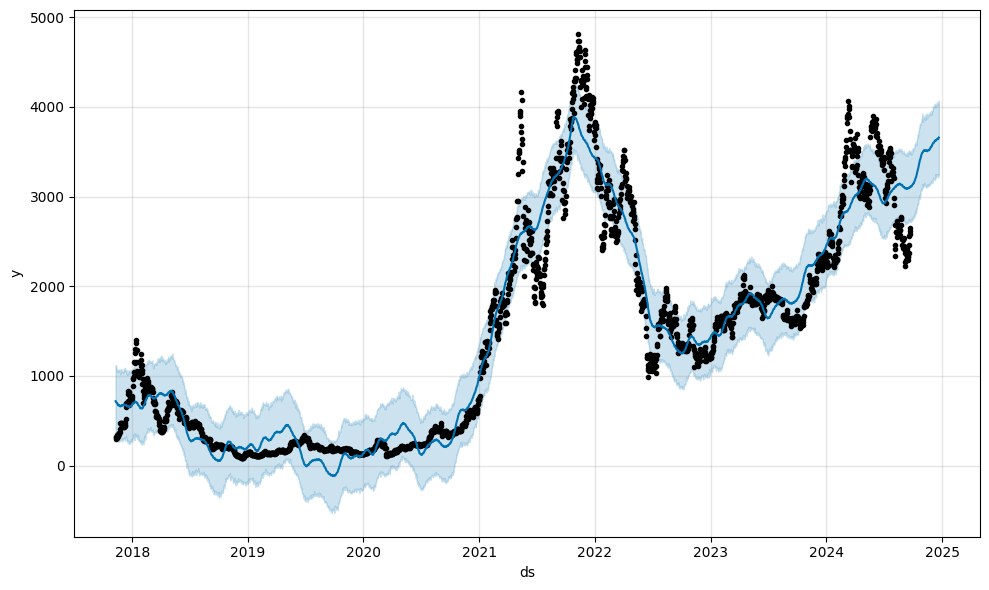

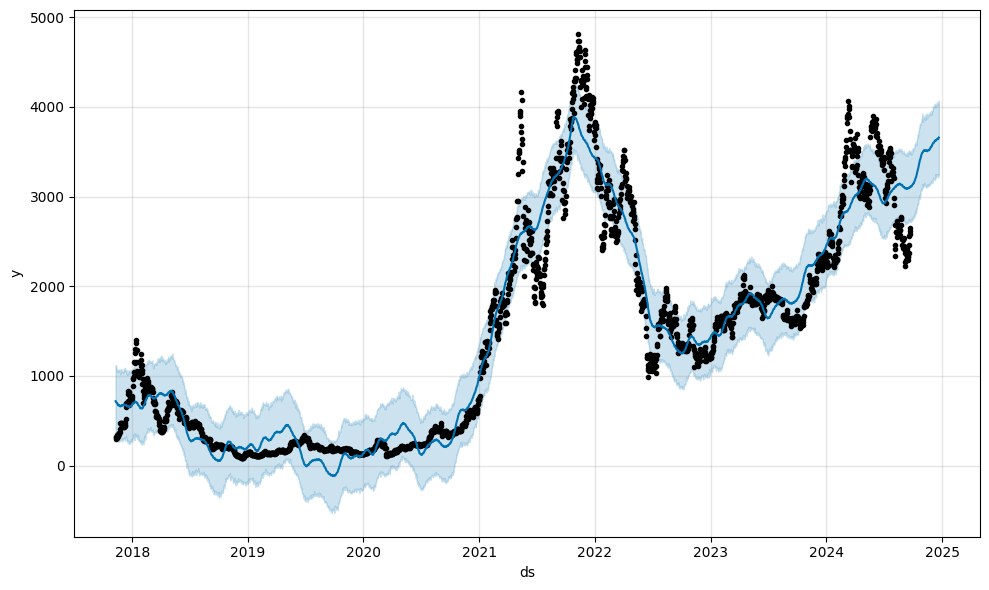

In [63]:
# Plot the forecast
prophet_model.plot(forecast)

In [64]:
# Split data into train and test sets
train = eth_prophet_df.iloc[:-90]  # Training data up to 90 days before the end
test = eth_prophet_df.iloc[-90:]   # Last 90 days as test data

# Fit the model on the training data
prophet_model = Prophet()
prophet_model.fit(train)

14:32:57 - cmdstanpy - INFO - Chain [1] start processing
14:32:57 - cmdstanpy - INFO - Chain [1] done processing


In [65]:
# Create a future dataframe for the test period (last 90 days)
future_test = prophet_model.make_future_dataframe(periods=90)

# Predict on the test period
forecast_test = prophet_model.predict(future_test)

# Extract the forecast for the test period
predictions = forecast_test[['ds', 'yhat']].tail(90).set_index('ds')
test.set_index('ds', inplace=True)

In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate MAE
mae = mean_absolute_error(test['y'], predictions['yhat'])
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test['y'], predictions['yhat']))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 600.674791271447
Root Mean Squared Error (RMSE): 719.5689550597342


In [67]:
import pickle

with open('prophet_model.pkl', 'wb') as f:
    pickle.dump(prophet_model, f)

print("Profeta salvo")

Profeta salvo


## SARIMA

In [24]:
# Fetch historical data for BTC-USD
eth_df = yf.download('ETH-USD', start='2022-01-01', end='2024-09-24')

eth_df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-01,3683.047119,3769.917969,3682.286621,3769.697021,3769.697021,9776191466
2022-01-02,3769.298340,3836.161865,3727.357422,3829.564941,3829.564941,9881471548
2022-01-03,3829.535645,3836.198730,3698.047607,3761.380371,3761.380371,12080777893
2022-01-04,3761.361572,3876.785156,3723.349854,3794.056641,3794.056641,14030925983
2022-01-05,3794.269043,3842.059814,3456.745361,3550.386963,3550.386963,18061338502


In [25]:
import numpy as np

# Log-transform the 'Close' prices to stabilize variance
eth_df['Close_log'] = np.log(eth_df['Close'])

# Display the first few rows of the log-transformed data
eth_df[['Close', 'Close_log']].head()

,Close,Close_log
Date,,
2022-01-01,3769.697021,8.234750
2022-01-02,3829.564941,8.250506
2022-01-03,3761.380371,8.232541
2022-01-04,3794.056641,8.241191
2022-01-05,3550.386963,8.174812


In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the SARIMA model parameters
# (p, d, q) = ARIMA terms, (P, D, Q, S) = seasonal terms
sarima_model = SARIMAX(eth_df['Close_log'], 
                       order=(1, 1, 1), 
                       seasonal_order=(1, 1, 1, 30))  # Monthly seasonality
sarima_result = sarima_model.fit(maxiter=50) 

# Print the summary of the SARIMA model
print(sarima_result.summary())

/Users/alencar/Desktop/Inteli/Modulo7/Farcry/src/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/alencar/Desktop/Inteli/Modulo7/Farcry/src/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.69838D+00    |proj g|=  7.62776D+00

At iterate    5    f= -1.75175D+00    |proj g|=  2.06216D-01

At iterate   10    f= -1.76247D+00    |proj g|=  1.86568D+00

At iterate   15    f= -1.76421D+00    |proj g|=  4.48128D-01

At iterate   20    f= -1.77289D+00    |proj g|=  2.29297D+00

At iterate   25    f= -1.77760D+00    |proj g|=  1.13035D-01

At iterate   30    f= -1.79303D+00    |proj g|=  1.21688D+00

At iterate   35    f= -1.79932D+00    |proj g|=  6.39655D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

In [27]:
# Forecast the next 90 days
forecast_steps = 90
forecast_log_sarima = sarima_result.forecast(steps=forecast_steps)

# Convert the forecast back to the original scale (exponential)
forecast_sarima = np.exp(forecast_log_sarima)

# Create a date range for the forecast period
forecast_dates = pd.date_range(start=eth_df.index[-1] + pd.Timedelta(days=1), periods=forecast_steps)

# Create a DataFrame to store the forecast
forecast_df_sarima = pd.DataFrame({'Date': forecast_dates, 'Forecast': forecast_sarima})
forecast_df_sarima.set_index('Date', inplace=True)

# Display the forecast
forecast_df_sarima.head(10)

,Forecast
Date,
2024-09-24,2668.445866
2024-09-25,2671.380881
2024-09-26,2662.416000
2024-09-27,2642.020825
2024-09-28,2627.919611
2024-09-29,2601.824199
2024-09-30,2623.197943
2024-10-01,2605.148579
2024-10-02,2604.077793


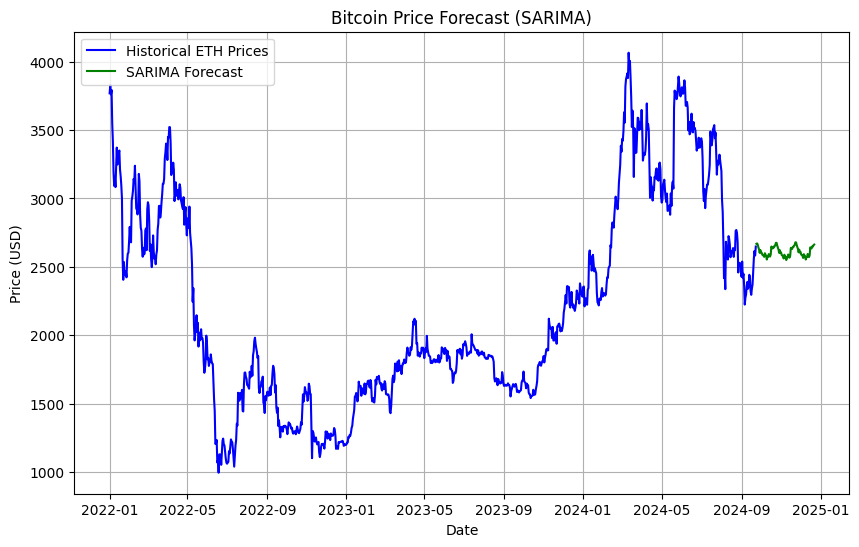

In [28]:
import matplotlib.pyplot as plt

# Plot the historical 'Close' prices and the SARIMA forecast
plt.figure(figsize=(10, 6))

# Plot historical Bitcoin prices
plt.plot(eth_df.index, eth_df['Close'], label='Historical ETH Prices', color='blue')

# Plot SARIMA forecasted prices
plt.plot(forecast_df_sarima.index, forecast_df_sarima['Forecast'], label='SARIMA Forecast', color='green')

# Add title and labels
plt.title('Bitcoin Price Forecast (SARIMA)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [29]:
# Train-test split: last 90 days as test data
train = eth_df['Close_log'][:-90]
test = eth_df['Close_log'][-90:]

In [30]:
# Fit SARIMA model on the training data
sarima_model_train = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 30))
sarima_result_train = sarima_model_train.fit(maxiter=50)

# Forecast for the next 90 days (test period)
forecast_test_log = sarima_result_train.forecast(steps=90)
forecast_test = np.exp(forecast_test_log)  # Convert back to original scale

/Users/alencar/Desktop/Inteli/Modulo7/Farcry/src/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/alencar/Desktop/Inteli/Modulo7/Farcry/src/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.68571D+00    |proj g|=  7.64019D+00


 This problem is unconstrained.



At iterate    5    f= -1.74072D+00    |proj g|=  2.50071D-01

At iterate   10    f= -1.75125D+00    |proj g|=  2.28953D+00

At iterate   15    f= -1.75399D+00    |proj g|=  4.41661D-01

At iterate   20    f= -1.76290D+00    |proj g|=  2.60961D+00

At iterate   25    f= -1.76900D+00    |proj g|=  1.74928D-01

At iterate   30    f= -1.78449D+00    |proj g|=  1.25141D+00

At iterate   35    f= -1.78976D+00    |proj g|=  3.24078D-01

At iterate   40    f= -1.78999D+00    |proj g|=  3.48809D-02

At iterate   45    f= -1.78999D+00    |proj g|=  6.58714D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     49     68   

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Convert the test set back to the original scale
test_original = np.exp(test)

# Calculate MAE
mae = mean_absolute_error(test_original, forecast_test)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_original, forecast_test))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 644.9059560094267
Root Mean Squared Error (RMSE): 774.4771126425609
